# Q1. Maximize f(x)  =  x^2 in the range  0 to 31 using GA

Gen   0 | Best x=30 f= 900
Gen   1 | Best x=31 f= 961
Reached optimal solution.

=== GA Result ===
Best chromosome (bits): 11111
Decoded x: 31
Fitness f(x)=x^2: 961


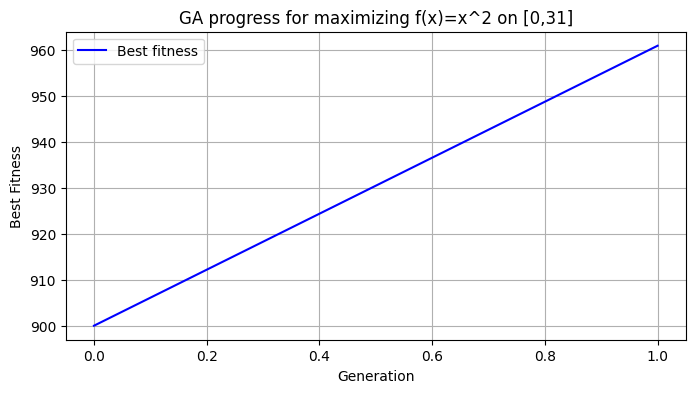

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ---------- Problem settings ----------
MIN_X = 0
MAX_X = 31           # range [0,31]
N_BITS = 5           # 2^5 = 32 -> encodes 0..31 exactly
POP_SIZE = 30
TOURNAMENT_SIZE = 3
CROSSOVER_RATE = 0.9
MUTATION_RATE = 1.0 / N_BITS
ELITISM = True
MAX_GENERATIONS = 100
RANDOM_SEED = 42

# Set seed for reproducibility
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ---------- Helper functions ----------
def int_to_bits(n, bits=N_BITS):
    """Convert integer to binary list."""
    return [int(b) for b in format(n, f'0{bits}b')]

def bits_to_int(bitlist):
    """Convert binary list to integer."""
    return int("".join(str(int(b)) for b in bitlist), 2)

def decode(chromosome):
    """Decode chromosome to integer x."""
    return bits_to_int(chromosome)

def fitness_of(x):
    """Fitness function f(x) = x^2."""
    return x * x

# ---------- Genetic operators ----------
def random_chromosome():
    return [random.choice([0, 1]) for _ in range(N_BITS)]

def create_initial_population(size=POP_SIZE):
    return [random_chromosome() for _ in range(size)]

def tournament_selection(pop, fitnesses, k=TOURNAMENT_SIZE):
    participants = random.sample(range(len(pop)), k)
    best = max(participants, key=lambda i: fitnesses[i])
    return pop[best].copy()

def single_point_crossover(a, b):
    point = random.randint(1, len(a) - 1)
    child1 = a[:point] + b[point:]
    child2 = b[:point] + a[point:]
    return child1, child2

def mutate(chrom):
    for i in range(len(chrom)):
        if random.random() < MUTATION_RATE:
            chrom[i] = 1 - chrom[i]

# ---------- GA run ----------
def run_ga():
    pop = create_initial_population()
    history_best = []

    for gen in range(MAX_GENERATIONS):
        decoded = [decode(ind) for ind in pop]
        fitnesses = [fitness_of(x) for x in decoded]

        best_idx = int(np.argmax(fitnesses))
        best_fit = fitnesses[best_idx]
        best_x = decoded[best_idx]
        history_best.append(best_fit)

        print(f"Gen {gen:3d} | Best x={best_x:2d} f={best_fit:4d}")

        # Stop if reached max possible value (31^2)
        if best_fit >= MAX_X * MAX_X:
            print("Reached optimal solution.")
            break

        new_pop = []
        if ELITISM:
            new_pop.append(pop[best_idx].copy())  # Keep best individual

        while len(new_pop) < POP_SIZE:
            parent1 = tournament_selection(pop, fitnesses)
            parent2 = tournament_selection(pop, fitnesses)

            if random.random() < CROSSOVER_RATE:
                child1, child2 = single_point_crossover(parent1, parent2)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            mutate(child1)
            mutate(child2)

            new_pop.append(child1)
            if len(new_pop) < POP_SIZE:
                new_pop.append(child2)

        pop = new_pop

    # Final best individual
    decoded = [decode(ind) for ind in pop]
    fitnesses = [fitness_of(x) for x in decoded]
    best_idx = int(np.argmax(fitnesses))
    best_chrom = pop[best_idx]
    best_x = decoded[best_idx]
    best_fit = fitnesses[best_idx]

    return {
        "best_x": best_x,
        "best_fitness": best_fit,
        "best_chromosome": best_chrom,
        "history_best": history_best
    }

# ---------- Run ----------
if __name__ == "__main__":
    result = run_ga()
    print("\n=== GA Result ===")
    print("Best chromosome (bits):", "".join(str(b) for b in result["best_chromosome"]))
    print("Decoded x:", result["best_x"])
    print("Fitness f(x)=x^2:", result["best_fitness"])

    # Plot best fitness over generations
    plt.figure(figsize=(8, 4))
    plt.plot(result["history_best"], label="Best fitness", color="blue")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("GA progress for maximizing f(x)=x^2 on [0,31]")
    plt.legend()
    plt.grid(True)
    plt.show()


# Minimize f(x) in the 0 to 31 using GA

Generation 1: Best x = 5, f(x) = 25
Generation 2: Best x = 4, f(x) = 16
Generation 3: Best x = 4, f(x) = 16
Generation 4: Best x = 0, f(x) = 0
Generation 5: Best x = 0, f(x) = 0
Generation 6: Best x = 0, f(x) = 0
Generation 7: Best x = 0, f(x) = 0
Generation 8: Best x = 0, f(x) = 0
Generation 9: Best x = 0, f(x) = 0
Generation 10: Best x = 0, f(x) = 0
Generation 11: Best x = 0, f(x) = 0
Generation 12: Best x = 0, f(x) = 0
Generation 13: Best x = 0, f(x) = 0
Generation 14: Best x = 0, f(x) = 0
Generation 15: Best x = 1, f(x) = 1
Generation 16: Best x = 1, f(x) = 1
Generation 17: Best x = 0, f(x) = 0
Generation 18: Best x = 1, f(x) = 1
Generation 19: Best x = 0, f(x) = 0
Generation 20: Best x = 0, f(x) = 0

Final Best Solution:
x = 1, f(x) = 1


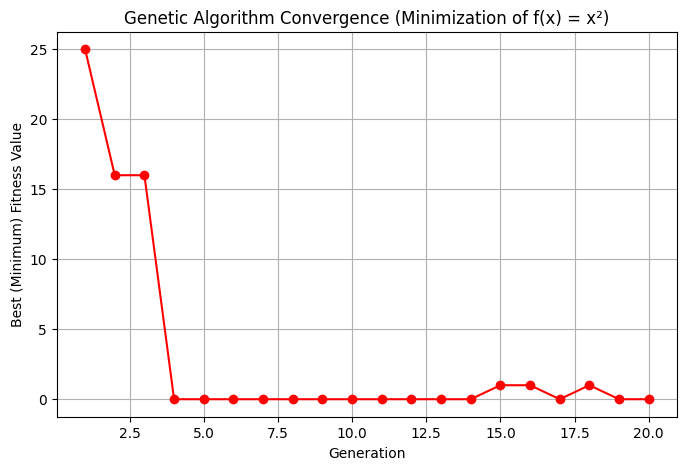

In [5]:
import random
import matplotlib.pyplot as plt

# --- Problem Definition ---
def fitness(x):
    """Fitness function: minimize f(x) = x^2"""
    return x ** 2

# --- GA Parameters ---
POP_SIZE = 6          # Number of individuals
CHROM_LENGTH = 5      # 2^5 = 32 possible values: 0–31
CROSS_RATE = 0.8
MUTATION_RATE = 0.1
GENERATIONS = 20

# --- Helper Functions ---
def decode(chromosome):
    """Convert binary string to decimal integer"""
    return int(chromosome, 2)

def encode(x):
    """Convert integer to binary string of fixed length"""
    return format(x, f'0{CHROM_LENGTH}b')

def select(population, fitness_values):
    """Roulette wheel selection (for minimization: invert fitness)"""
    # In minimization, smaller f(x) is better → use 1/(1+f) as selection weight
    inv_fit = [1 / (1 + f) for f in fitness_values]
    total_fit = sum(inv_fit)
    probs = [f / total_fit for f in inv_fit]
    return random.choices(population, weights=probs, k=POP_SIZE)

def crossover(parent1, parent2):
    """Single-point crossover"""
    if random.random() < CROSS_RATE:
        point = random.randint(1, CHROM_LENGTH - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1, parent2

def mutate(chromosome):
    """Bit-flip mutation"""
    mutated = ""
    for bit in chromosome:
        if random.random() < MUTATION_RATE:
            mutated += '0' if bit == '1' else '1'
        else:
            mutated += bit
    return mutated

# --- Main GA Loop ---
population = [encode(random.randint(0, 31)) for _ in range(POP_SIZE)]
best_fitness_progress = []

for generation in range(GENERATIONS):
    decoded = [decode(ch) for ch in population]
    fitness_values = [fitness(x) for x in decoded]

    # Track the best (lowest) solution
    best_idx = fitness_values.index(min(fitness_values))
    best_chrom = population[best_idx]
    best_x = decode(best_chrom)
    best_fit = fitness(best_x)

    best_fitness_progress.append(best_fit)
    print(f"Generation {generation+1}: Best x = {best_x}, f(x) = {best_fit}")

    # Selection (using inverse fitness)
    selected = select(population, fitness_values)

    # Crossover
    next_gen = []
    for i in range(0, POP_SIZE, 2):
        parent1 = selected[i]
        parent2 = selected[(i + 1) % POP_SIZE]
        child1, child2 = crossover(parent1, parent2)
        next_gen.extend([child1, child2])

    # Mutation
    population = [mutate(ch) for ch in next_gen]

# --- Final Result ---
decoded = [decode(ch) for ch in population]
fitness_values = [fitness(x) for x in decoded]
best_idx = fitness_values.index(min(fitness_values))
best_x = decoded[best_idx]
best_fit = fitness_values[best_idx]

print("\nFinal Best Solution:")
print(f"x = {best_x}, f(x) = {best_fit}")

# --- Plot the Fitness Progress ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, GENERATIONS + 1), best_fitness_progress, marker='o', color='red')
plt.title("Genetic Algorithm Convergence (Minimization of f(x) = x²)")
plt.xlabel("Generation")
plt.ylabel("Best (Minimum) Fitness Value")
plt.grid(True)
plt.show()


# Minimize y = √x, subject to 1.0 <= x <= 16.0

Generation 01: Best x = 1.0975, f(x) = 1.0476
Generation 02: Best x = 1.4050, f(x) = 1.1853
Generation 03: Best x = 1.5603, f(x) = 1.2491
Generation 04: Best x = 1.2620, f(x) = 1.1234
Generation 05: Best x = 1.0000, f(x) = 1.0000
Generation 06: Best x = 1.0000, f(x) = 1.0000
Generation 07: Best x = 1.0000, f(x) = 1.0000
Generation 08: Best x = 1.0036, f(x) = 1.0018
Generation 09: Best x = 1.0331, f(x) = 1.0164
Generation 10: Best x = 1.0000, f(x) = 1.0000
Generation 11: Best x = 1.0341, f(x) = 1.0169
Generation 12: Best x = 1.0000, f(x) = 1.0000
Generation 13: Best x = 1.0000, f(x) = 1.0000
Generation 14: Best x = 1.0000, f(x) = 1.0000
Generation 15: Best x = 1.0000, f(x) = 1.0000
Generation 16: Best x = 1.0000, f(x) = 1.0000
Generation 17: Best x = 1.0000, f(x) = 1.0000
Generation 18: Best x = 1.0000, f(x) = 1.0000
Generation 19: Best x = 1.0000, f(x) = 1.0000
Generation 20: Best x = 1.0000, f(x) = 1.0000
Generation 21: Best x = 1.0000, f(x) = 1.0000
Generation 22: Best x = 1.0000, f(

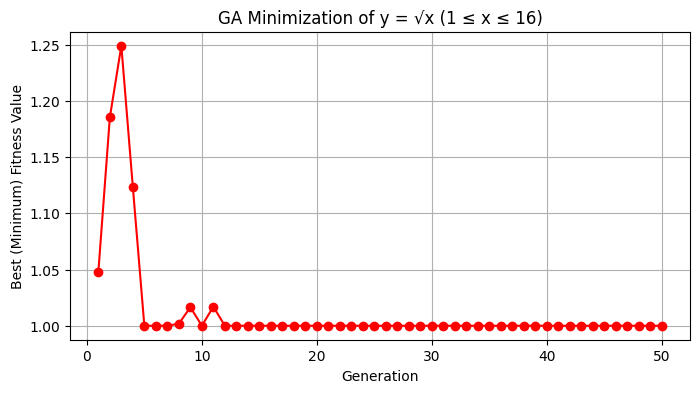

In [1]:
import random
import math
import matplotlib.pyplot as plt

# ---------- Problem Definition ----------
def fitness(x):
    """Objective: minimize y = sqrt(x)"""
    return math.sqrt(x)

# ---------- GA Parameters ----------
POP_SIZE = 20
CROSS_RATE = 0.8
MUTATION_RATE = 0.1
GENERATIONS = 50
X_MIN, X_MAX = 1.0, 16.0
RANDOM_SEED = 42

random.seed(RANDOM_SEED)

# ---------- Helper Functions ----------
def create_individual():
    """Create a random individual within range."""
    return random.uniform(X_MIN, X_MAX)

def select(pop, fitness_values):
    """Tournament selection for minimization (smaller is better)."""
    i1, i2 = random.sample(range(len(pop)), 2)
    if fitness_values[i1] < fitness_values[i2]:
        return pop[i1]
    return pop[i2]

def crossover(parent1, parent2):
    """Arithmetic crossover (real-coded)."""
    if random.random() < CROSS_RATE:
        alpha = random.random()
        child1 = alpha * parent1 + (1 - alpha) * parent2
        child2 = alpha * parent2 + (1 - alpha) * parent1
        return child1, child2
    return parent1, parent2

def mutate(x):
    """Gaussian mutation."""
    if random.random() < MUTATION_RATE:
        x += random.uniform(-1, 1)
        # Clip to bounds
        x = max(X_MIN, min(X_MAX, x))
    return x

# ---------- Main GA Loop ----------
def run_ga():
    population = [create_individual() for _ in range(POP_SIZE)]
    best_fitness_progress = []

    for gen in range(GENERATIONS):
        fitness_values = [fitness(x) for x in population]

        # Best solution (minimization)
        best_idx = fitness_values.index(min(fitness_values))
        best_x = population[best_idx]
        best_fit = fitness_values[best_idx]
        best_fitness_progress.append(best_fit)

        print(f"Generation {gen+1:02d}: Best x = {best_x:.4f}, f(x) = {best_fit:.4f}")

        # Create next generation
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1 = select(population, fitness_values)
            parent2 = select(population, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population[:POP_SIZE]

    # Final best solution
    fitness_values = [fitness(x) for x in population]
    best_idx = fitness_values.index(min(fitness_values))
    best_x = population[best_idx]
    best_fit = fitness_values[best_idx]

    return best_x, best_fit, best_fitness_progress

# ---------- Run ----------
if __name__ == "__main__":
    best_x, best_fit, progress = run_ga()

    print("\n=== Final GA Result ===")
    print(f"Best x = {best_x:.4f}")
    print(f"Minimum y = sqrt(x) = {best_fit:.4f}")

    # Plot convergence
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(progress) + 1), progress, marker='o', color='red')
    plt.xlabel("Generation")
    plt.ylabel("Best (Minimum) Fitness Value")
    plt.title("GA Minimization of y = √x (1 ≤ x ≤ 16)")
    plt.grid(True)
    plt.show()
